#Bee Detector

## Installation

In [ ]:
# uncomment the next line if you want to delete an existing models directory
!rm -rf ./models/

# clone the Tensorflow Model Garden
!git clone --depth 1 https://github.com/tensorflow/models/

Cloning into 'models'...
remote: Enumerating objects: 2861, done.
remote: Counting objects: 100% (2861/2861), done.
remote: Compressing objects: 100% (2395/2395), done.
remote: Total 2861 (delta 735), reused 1337 (delta 430), pack-reused 0
Receiving objects: 100% (2861/2861), 32.88 MiB | 18.14 MiB/s, done.
Resolving deltas: 100% (735/735), done.


In [ ]:
# install the Object Detection API
!cd models/research/ && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .

Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1661033 sha256=1b575c3964584fc80fedb2f52e9ec2e3b06f059ee5baa0f57b30adbb87401197
  Stored in directory: /tmp/pip-ephem-wheel-cache-cdgcbptg/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


## Imports

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

import os
import random
import zipfile
import io
import scipy.misc
import numpy as np

import glob
import imageio
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
tf.get_logger().setLevel('ERROR')

In [ ]:
### START CODE HERE (Replace Instances of `None` with your code) ###
# import the label map utility module
from object_detection.utils import label_map_util

# import module for reading and updating configuration files.
from object_detection.utils import config_util

# import module for visualization. use the alias `viz_utils`
from object_detection.utils import visualization_utils as viz_utils

# import module for building the detection model
from object_detection.builders import model_builder
### END CODE HERE ###

# import module for utilities in Colab
from object_detection.utils import colab_utils

## Utility functions

In [ ]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array."""
    
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data))
    (im_width, im_height) = image.size
    
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)


def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None):
    
    image_np_with_annotations = image_np.copy()
    
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_annotations,
        boxes,
        classes,
        scores,
        category_index,
        use_normalized_coordinates=True,
        min_score_thresh=0.8)
    
    if image_name:
        plt.imsave(image_name, image_np_with_annotations)
    
    else:
        plt.imshow(image_np_with_annotations)


##Visualization

/content/bee-1.jpg
/content/bee-2.jpg
/content/bee-3.jpg
/content/bee-4.jpg
/content/bee-5.jpg
/content/bee-6.jpg
/content/bee-7.jpg
/content/bee-8.jpg
/content/bee-9.jpg
/content/bee-10.jpg
/content/bee-11.jpg
/content/bee-12.jpg
/content/bee-13.jpg
/content/bee-14.jpg
/content/bee-15.jpg
/content/bee-16.jpg
/content/bee-17.jpg


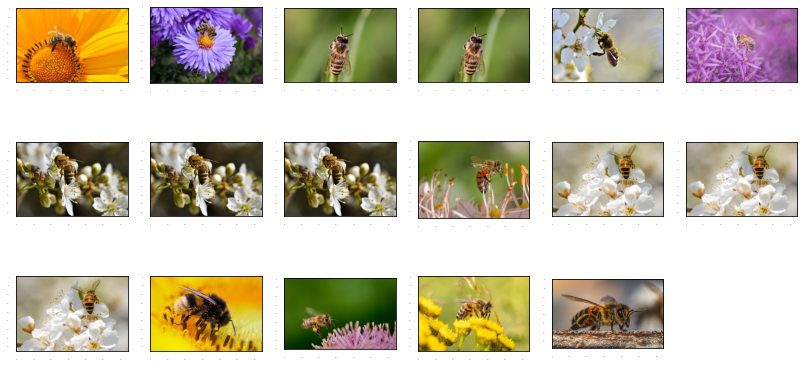

In [ ]:
%matplotlib inline
train_image_dir = '/content'
train_images_np = list()

for i in range(1, 18):

    image_path = os.path.join(f'{train_image_dir}', f'bee-{str(i)}.jpg')
    print(image_path)

    train_images_np.append(load_image_into_numpy_array(image_path))

plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = False
plt.rcParams['ytick.labelsize'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['figure.figsize'] = [14, 7]


for idx, train_image_np in enumerate(train_images_np):
    plt.subplot(3, 6, idx+1)
    plt.imshow(train_image_np)

plt.show()

##Anotate The Images

In [ ]:
# Define the list of ground truth boxes
gt_boxes = []

In [ ]:
# annotate the training images
colab_utils.annotate(train_images_np, box_storage_pointer=gt_boxes)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'--boxes array populated--'

<IPython.core.display.Javascript object>

In [ ]:
for gt_box in gt_boxes:
  print(gt_box)

[[0.23166667 0.2609375  0.64833333 0.55625   ]]
[[0.13833333 0.3875     0.43166667 0.6046875 ]]
[[0.19166667 0.346875   0.94833333 0.64375   ]]
[[0.20666667 0.3671875  0.92166667 0.6109375 ]]
[[0.27833333 0.340625   0.84       0.65625   ]]
[[0.345      0.4265625  0.59166667 0.6421875 ]]
[[0.17       0.309375   0.58333333 0.6234375 ]]
[[0.15666667 0.284375   0.58       0.64375   ]]
[[0.13833333 0.315625   0.59666667 0.628125  ]]
[[0.16666667 0.4453125  0.7        0.775     ]]
[[0.06166667 0.490625   0.52       0.79375   ]]
[[0.04666667 0.4703125  0.52166667 0.78125   ]]
[[0.08666667 0.46875    0.53166667 0.809375  ]]
[[0.07333333 0.1234375  0.815      0.78125   ]]
[[0.39833333 0.0984375  0.85666667 0.5078125 ]]
[[0.29       0.2890625  0.61833333 0.7078125 ]]
[[0.21333333 0.059375   0.78       0.903125  ]]


In [ ]:
bee_class_id = 1
category_index = {bee_class_id: {'id': bee_class_id, 'name': 'bee'}}

num_classes = 1

In [ ]:
print(category_index[bee_class_id])

{'id': 1, 'name': 'bee'}


### Data preprocessing

In [ ]:
label_id_offset = 1
train_image_tensors = []

# lists containing the one-hot encoded classes and ground truth boxes
gt_classes_one_hot_tensors = []
gt_box_tensors = []

for (train_image_np, gt_box_np) in zip(train_images_np, gt_boxes):
    
    # convert training image to tensor, add batch dimension, and add to list
    train_image_tensors.append(tf.expand_dims(tf.convert_to_tensor(
        train_image_np, dtype=tf.float32), axis=0))
    
    # convert numpy array to tensor, then add to list
    gt_box_tensors.append(tf.convert_to_tensor(gt_box_np, dtype=tf.float32))
    
    # apply offset to to have zero-indexed ground truth classes
    zero_indexed_groundtruth_classes = tf.convert_to_tensor(
        np.ones(shape=[gt_box_np.shape[0]], dtype=np.int32) - label_id_offset)
    
    # do one-hot encoding to ground truth classes
    gt_classes_one_hot_tensors.append(tf.one_hot(
        zero_indexed_groundtruth_classes, num_classes))

print('Done prepping data.')

Done prepping data.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Visualize with their ground truth bounding boxes


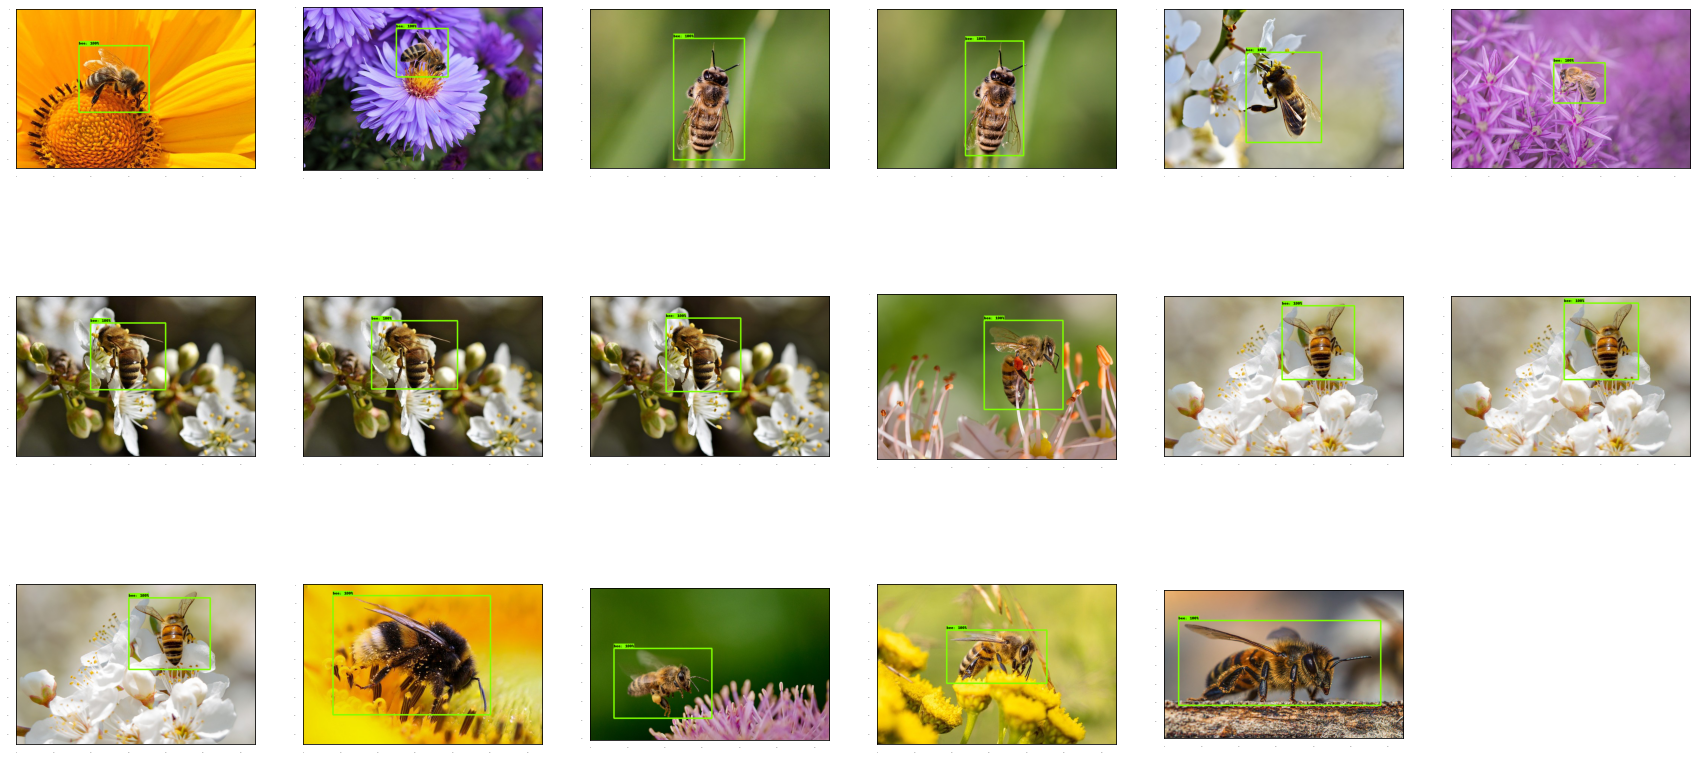

In [ ]:
# give boxes a score of 100%
dummy_scores = np.array([1.0], dtype=np.float32)

# define the figure size
plt.figure(figsize=(30, 15))

# use the `plot_detections()` utility function to draw the ground truth boxes
for idx in range(17):
    plt.subplot(3, 6, idx+1)
    plot_detections(
      train_images_np[idx],
      gt_boxes[idx],
      np.ones(shape=[gt_boxes[idx].shape[0]], dtype=np.int32),
      dummy_scores, category_index)

plt.show()

## Download the checkpoint containing the pre-trained weights


In [ ]:
# Download the SSD Resnet 50 version 1, 640x640 checkpoint
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
    
# untar (decompress) the tar file
!tar -xf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

# copy the checkpoint to the test_data folder models/research/object_detection/test_data/
!mv ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint models/research/object_detection/test_data/


--2021-08-28 06:30:32--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.204.128, 2404:6800:4008:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.204.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M  65.9MB/s    in 3.5s    

2021-08-28 06:30:36 (65.9 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [244817203/244817203]



## Configuring the model


In [ ]:
tf.keras.backend.clear_session()

pipeline_config = "/content/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config"

configs = config_util.get_configs_from_pipeline_file(pipeline_config)

configs

In [ ]:
model_config = configs['model']

model_config

ssd {
  num_classes: 90
  image_resizer {
    fixed_shape_resizer {
      height: 640
      width: 640
    }
  }
  feature_extractor {
    type: "ssd_resnet50_v1_fpn_keras"
    depth_multiplier: 1.0
    min_depth: 16
    conv_hyperparams {
      regularizer {
        l2_regularizer {
          weight: 0.00039999998989515007
        }
      }
      initializer {
        truncated_normal_initializer {
          mean: 0.0
          stddev: 0.029999999329447746
        }
      }
      activation: RELU_6
      batch_norm {
        decay: 0.996999979019165
        scale: true
        epsilon: 0.0010000000474974513
      }
    }
    override_base_feature_extractor_hyperparams: true
    fpn {
      min_level: 3
      max_level: 7
    }
  }
  box_coder {
    faster_rcnn_box_coder {
      y_scale: 10.0
      x_scale: 10.0
      height_scale: 5.0
      width_scale: 5.0
    }
  }
  matcher {
    argmax_matcher {
      matched_threshold: 0.5
      unmatched_threshold: 0.5
      ignore_thresholds: f

In [ ]:
model_config.ssd.num_classes = num_classes
model_config.ssd.freeze_batchnorm = True

model_config

ssd {
  num_classes: 1
  image_resizer {
    fixed_shape_resizer {
      height: 640
      width: 640
    }
  }
  feature_extractor {
    type: "ssd_resnet50_v1_fpn_keras"
    depth_multiplier: 1.0
    min_depth: 16
    conv_hyperparams {
      regularizer {
        l2_regularizer {
          weight: 0.00039999998989515007
        }
      }
      initializer {
        truncated_normal_initializer {
          mean: 0.0
          stddev: 0.029999999329447746
        }
      }
      activation: RELU_6
      batch_norm {
        decay: 0.996999979019165
        scale: true
        epsilon: 0.0010000000474974513
      }
    }
    override_base_feature_extractor_hyperparams: true
    fpn {
      min_level: 3
      max_level: 7
    }
  }
  box_coder {
    faster_rcnn_box_coder {
      y_scale: 10.0
      x_scale: 10.0
      height_scale: 5.0
      width_scale: 5.0
    }
  }
  matcher {
    argmax_matcher {
      matched_threshold: 0.5
      unmatched_threshold: 0.5
      ignore_thresholds: fa

## Build the model

In [ ]:
detection_model = model_builder.build(model_config, True)
print(type(detection_model))

<class 'object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch'>


In [ ]:
detection_model

In [ ]:
tmp_box_predictor_checkpoint = tf.compat.v2.train.Checkpoint(_base_tower_layers_for_heads=detection_model._box_predictor._base_tower_layers_for_heads, 
                                                   _box_prediction_head=detection_model._box_predictor._box_prediction_head)
    
    

In [ ]:
type(tmp_box_predictor_checkpoint)


tensorflow.python.training.tracking.util.Checkpoint

In [ ]:
# Check the variables of this checkpoint
vars(tmp_box_predictor_checkpoint)

{'_attached_dependencies': None,
 '_base_tower_layers_for_heads': DictWrapper({'box_encodings': ListWrapper([]), 'class_predictions_with_background': ListWrapper([])}),
 '_box_prediction_head': <object_detection.predictors.heads.keras_box_head.WeightSharedConvolutionalBoxHead at 0x7f9c2cc243d0>,
 '_save_assign_op': None,
 '_save_counter': None,
 '_saver': <tensorflow.python.training.tracking.util.TrackableSaver at 0x7f9c201285d0>,
 '_self_name_based_restores': set(),
 '_self_saveable_object_factories': {},
 '_self_setattr_tracking': True,
 '_self_unconditional_checkpoint_dependencies': [TrackableReference(name='_base_tower_layers_for_heads', ref=DictWrapper({'box_encodings': ListWrapper([]), 'class_predictions_with_background': ListWrapper([])})),
  TrackableReference(name='_box_prediction_head', ref=<object_detection.predictors.heads.keras_box_head.WeightSharedConvolutionalBoxHead object at 0x7f9c2cc243d0>)],
 '_self_unconditional_deferred_dependencies': {},
 '_self_unconditional_depe

In [ ]:
tmp_model_checkpoint = None

tmp_model_checkpoint = tf.compat.v2.train.Checkpoint(_feature_extractor=detection_model._feature_extractor,
                                           _box_predictor=tmp_box_predictor_checkpoint
                                           )
          
        

In [ ]:
vars(tmp_model_checkpoint)

{'_attached_dependencies': None,
 '_box_predictor': <tensorflow.python.training.tracking.util.Checkpoint at 0x7f9c20128550>,
 '_feature_extractor': <object_detection.models.ssd_resnet_v1_fpn_keras_feature_extractor.SSDResNet50V1FpnKerasFeatureExtractor at 0x7f9c20301710>,
 '_save_assign_op': None,
 '_save_counter': None,
 '_saver': <tensorflow.python.training.tracking.util.TrackableSaver at 0x7f9c201282d0>,
 '_self_name_based_restores': set(),
 '_self_saveable_object_factories': {},
 '_self_setattr_tracking': True,
 '_self_unconditional_checkpoint_dependencies': [TrackableReference(name='_box_predictor', ref=<tensorflow.python.training.tracking.util.Checkpoint object at 0x7f9c20128550>),
  TrackableReference(name='_feature_extractor', ref=<object_detection.models.ssd_resnet_v1_fpn_keras_feature_extractor.SSDResNet50V1FpnKerasFeatureExtractor object at 0x7f9c20301710>)],
 '_self_unconditional_deferred_dependencies': {},
 '_self_unconditional_dependency_names': {'_box_predictor': <tensor

In [ ]:
checkpoint_path = '/content/models/research/object_detection/test_data/checkpoint/ckpt-0'

checkpoint = tf.compat.v2.train.Checkpoint(model=tmp_model_checkpoint)

checkpoint.restore(checkpoint_path)


In [ ]:
tmp_image, tmp_shapes = detection_model.preprocess(tf.zeros([1, 640, 640, 3]))

tmp_prediction_dict = detection_model.predict(tmp_image, tmp_shapes)

tmp_detections = detection_model.postprocess(tmp_prediction_dict, tmp_shapes)

print('Weights restored!')

Weights restored!


## Custom training loop


In [ ]:
tf.keras.backend.set_learning_phase(True)

batch_size = 4
num_batches = 100
learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate, momentum=0.9)


/usr/local/lib/python3.7/dist-packages/keras/backend.py:401: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [ ]:
for i,v in enumerate(detection_model.trainable_variables):
    print(f"i: {i} \t name: {v.name} \t shape:{v.shape} \t dtype={v.dtype}")

In [ ]:

to_fine_tune = []
prefixes_to_train = [
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalBoxHead',
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalClassHead']
for var in detection_model.trainable_variables:
  if any([var.name.startswith(prefix) for prefix in prefixes_to_train]):
    to_fine_tune.append(var)


## Train your model


In [ ]:
# Get a batch of your training images
g_images_list = train_image_tensors[0:2]

In [ ]:
# Use .preprocess to preprocess an image
g_preprocessed_image = detection_model.preprocess(g_images_list[0])
print(f"g_preprocessed_image type: {type(g_preprocessed_image)}")
print(f"g_preprocessed_image length: {len(g_preprocessed_image)}")
print(f"index 0 has the preprocessed image of shape {g_preprocessed_image[0].shape}")
print(f"index 1 has information about the image's true shape excluding padding: {g_preprocessed_image[1]}")

g_preprocessed_image type: <class 'tuple'>
g_preprocessed_image length: 2
index 0 has the preprocessed image of shape (1, 640, 640, 3)
index 1 has information about the image's true shape excluding padding: [[640 640   3]]


In [ ]:
preprocessed_image_list = []
true_shape_list = []

for img in g_images_list:
    processed_img, true_shape = detection_model.preprocess(img)
    preprocessed_image_list.append(processed_img)
    true_shape_list.append(true_shape)

print(f"preprocessed_image_list is of type {type(preprocessed_image_list)}")
print(f"preprocessed_image_list has length {len(preprocessed_image_list)}")
print()
print(f"true_shape_list is of type {type(true_shape_list)}")
print(f"true_shape_list has length {len(true_shape_list)}")


preprocessed_image_list is of type <class 'list'>
preprocessed_image_list has length 2

true_shape_list is of type <class 'list'>
true_shape_list has length 2


In [ ]:
print(true_shape_list)

[<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[640, 640,   3]], dtype=int32)>, <tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[640, 640,   3]], dtype=int32)>]


##Make Predictions

In [ ]:
# Try to call `predict` and pass in lists; look at the error message
try:
    detection_model.predict(preprocessed_image_list, true_shape_list)
except AttributeError as e:
    print("Error message:", e)

Error message: 'list' object has no attribute 'get_shape'


In [ ]:
# Turn a list of tensors into a tensor
preprocessed_image_tensor = tf.concat(preprocessed_image_list, axis=0)
true_shape_tensor = tf.concat(true_shape_list, axis=0)

print(f"preprocessed_image_tensor shape: {preprocessed_image_tensor.shape}")
print(f"true_shape_tensor shape: {true_shape_tensor.shape}")

preprocessed_image_tensor shape: (2, 640, 640, 3)
true_shape_tensor shape: (2, 3)


In [ ]:
# Make predictions on the images
prediction_dict = detection_model.predict(preprocessed_image_tensor, true_shape_tensor)

print("keys in prediction_dict:")
for key in prediction_dict.keys():
    print(key)

keys in prediction_dict:
preprocessed_inputs
feature_maps
anchors
final_anchors
box_encodings
class_predictions_with_background


In [ ]:
try:
    losses_dict = detection_model.loss(prediction_dict, true_shape_tensor)
except RuntimeError as e:
    print(e)

Groundtruth tensor boxes has not been provided


In [ ]:
# Get the ground truth bounding boxes
gt_boxes_list = gt_box_tensors[0:2]

# Get the ground truth class labels
gt_classes_list = gt_classes_one_hot_tensors[0:2]

# Provide the ground truth to the model
detection_model.provide_groundtruth(
            groundtruth_boxes_list=gt_boxes_list,
            groundtruth_classes_list=gt_classes_list)

In [ ]:
# Calculate the loss after you've provided the ground truth 
losses_dict = detection_model.loss(prediction_dict, true_shape_tensor)

# View the loss dictionary
losses_dict = detection_model.loss(prediction_dict, true_shape_tensor)
print(f"loss dictionary keys: {losses_dict.keys()}")
print(f"localization loss {losses_dict['Loss/localization_loss']:.8f}")
print(f"classification loss {losses_dict['Loss/classification_loss']:.8f}")

loss dictionary keys: dict_keys(['Loss/localization_loss', 'Loss/classification_loss'])
localization loss 0.32091621
classification loss 1.17504907


In [ ]:
# Let's just reset the model so that you can practice setting it up yourself!
detection_model.provide_groundtruth(groundtruth_boxes_list=[], groundtruth_classes_list=[])

##Training

In [ ]:
@tf.function
def train_step_fn(image_list,
                groundtruth_boxes_list,
                groundtruth_classes_list,
                model,
                optimizer,
                vars_to_fine_tune):

    with tf.GradientTape() as tape:      

        # Preprocess the images
        preprocessed_image_list = []
        shapes = list()
        
        

        for img in image_list:
            preprocessed_img, img_shape = model.preprocess(img)
            preprocessed_image_list.append(preprocessed_img)
            shapes.append(img_shape)
            

        preprocessed_image_tensor = tf.concat(preprocessed_image_list, axis=0)
        true_shape_tensor = tf.concat(img_shape, axis=0)

        # Make a prediction
        prediction_dict = model.predict(preprocessed_image_tensor, true_shape_tensor)

        # Calculate the total loss (sum of both losses)
        model.provide_groundtruth(groundtruth_boxes_list, groundtruth_classes_list)
        loss = (model.loss(prediction_dict, true_shape_tensor))
        total_loss = loss['Loss/localization_loss'] + loss['Loss/classification_loss']

        # Calculate the gradients
        gradients = tape.gradient(total_loss, vars_to_fine_tune)

        # Optimize the model's selected variables
        optimizer.apply_gradients(zip(gradients, vars_to_fine_tune))
                
    return total_loss

### Run the training loop


In [ ]:
print('Start fine-tuning!', flush=True)

for idx in range(num_batches):
    # Grab keys for a random subset of examples
    all_keys = list(range(len(train_images_np)))
    random.shuffle(all_keys)
    example_keys = all_keys[:batch_size]

    # Get the ground truth
    gt_boxes_list = [gt_box_tensors[key] for key in example_keys]
    gt_classes_list = [gt_classes_one_hot_tensors[key] for key in example_keys]
    
    # get the images
    image_tensors = [train_image_tensors[key] for key in example_keys]

    # Training step (forward pass + backwards pass)
    total_loss = train_step_fn(image_tensors, 
                               gt_boxes_list, 
                               gt_classes_list,
                               detection_model,
                               optimizer,
                               to_fine_tune
                              )

    if idx % 10 == 0:
        print('batch ' + str(idx) + ' of ' + str(num_batches)
        + ', loss=' +  str(total_loss.numpy()), flush=True)

print('Done fine-tuning!')

Start fine-tuning!
batch 0 of 100, loss=1.5781744
batch 10 of 100, loss=0.52747303
batch 20 of 100, loss=0.512837
batch 30 of 100, loss=0.45053393
batch 40 of 100, loss=0.5576705
batch 50 of 100, loss=0.22652705
batch 60 of 100, loss=0.13169453
batch 70 of 100, loss=0.06822716
batch 80 of 100, loss=0.062169857
batch 90 of 100, loss=0.05962049
Done fine-tuning!


You will load these images into numpy arrays to prepare it for inference.

In [ ]:
test_image_dir = './results/'
test_images_np = [np.expand_dims(
       load_image_into_numpy_array("/content/bee-test1.jpg"), axis=0),
       np.expand_dims(
       load_image_into_numpy_array("/content/bee-test3.jpg"), axis=0),
       np.expand_dims(
       load_image_into_numpy_array("/content/bee-test4.jpg"), axis=0),
       np.expand_dims(
       load_image_into_numpy_array("/content/bee-test5.jpg"), axis=0)]                                  # Add the path to your images here


##Prediction

In [ ]:
@tf.function
def detect(input_tensor):

    preprocessed_image, shapes = detection_model.preprocess(input_tensor)
    prediction_dict = detection_model.predict(preprocessed_image, shapes)
    
    detections = detection_model.postprocess(prediction_dict, shapes)    
    return detections

In [ ]:
label_id_offset = 1
results = {'boxes': [], 'scores': []}

for i in range(len(test_images_np)):
    input_tensor = tf.convert_to_tensor(test_images_np[i], dtype=tf.float32)
    detections = detect(input_tensor)
    plot_detections(
      test_images_np[i][0],
      detections['detection_boxes'][0].numpy(),
      detections['detection_classes'][0].numpy().astype(np.uint32)
      + label_id_offset,
      detections['detection_scores'][0].numpy(),
      category_index, figsize=(15, 20), image_name=f"./results/output_{i}" + ".jpg")
    results['boxes'].append(detections['detection_boxes'][0][0].numpy())
    results['scores'].append(detections['detection_scores'][0][0].numpy())

Image 1


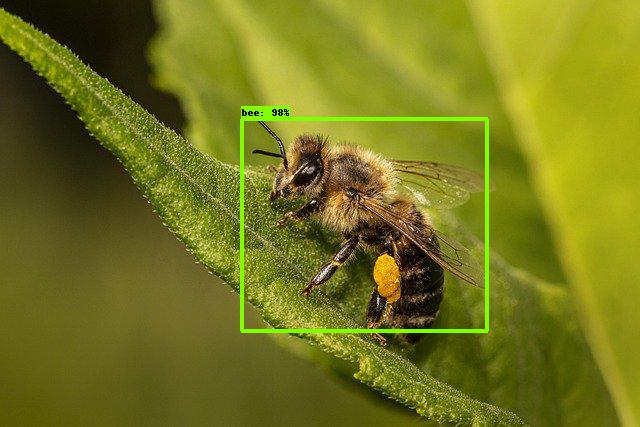


Image 2


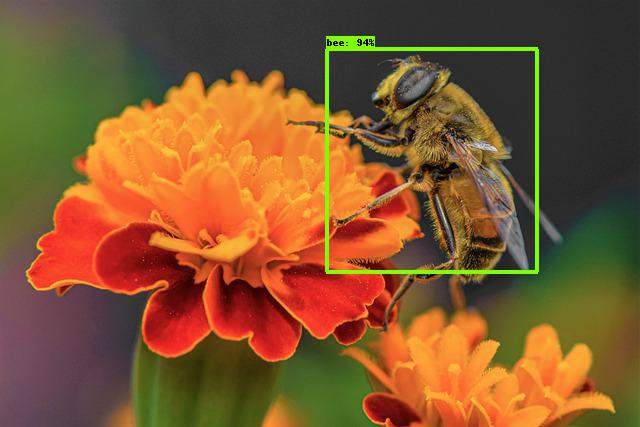


Image 3


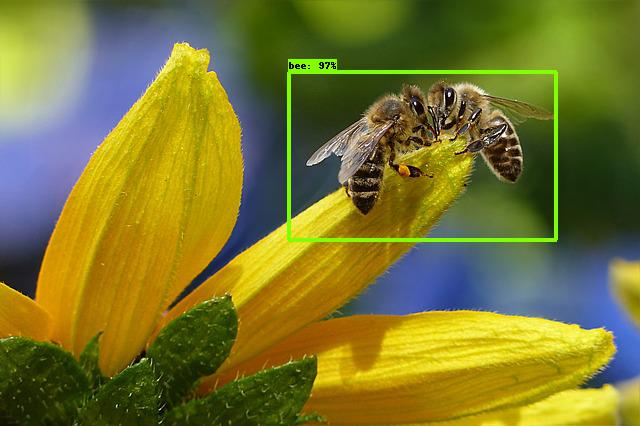


Image 4


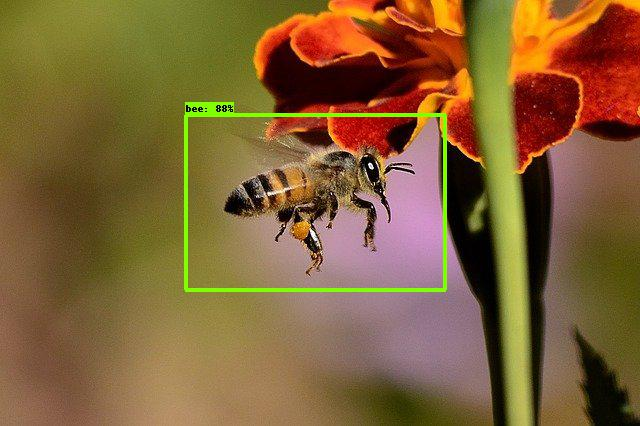

In [ ]:
print('Image 1')
display(IPyImage('./results/output_0.jpg'))
print()
print('Image 2')
display(IPyImage('./results/output_1.jpg'))
print()
print('Image 3')
display(IPyImage('./results/output_2.jpg'))
print()
print('Image 4')
display(IPyImage('./results/output_3.jpg'))

In [ ]:
tf.saved_model.save(detection_model, '/content/bee_detection_model/')

In [ ]:
!zip -r /content/bee_detection_model.zip /content/bee_detection_model

  adding: content/bee_detection_model/ (stored 0%)
  adding: content/bee_detection_model/variables/ (stored 0%)
  adding: content/bee_detection_model/variables/variables.index (deflated 80%)
  adding: content/bee_detection_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/bee_detection_model/saved_model.pb (deflated 92%)
  adding: content/bee_detection_model/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download("/content/bee_detection_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>